In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch

In [ ]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import pair_confusion_matrix

In [ ]:
breast_cancer = datasets.load_breast_cancer()
scaler = StandardScaler()

In [ ]:
X = breast_cancer.data
y = breast_cancer.target
X_scaled  = scaler.fit_transform(breast_cancer.data)

In [ ]:
brich = Birch(n_clusters = 2)

In [ ]:
ypred_normal = brich.fit_predict(X)
ypred_scaled =  brich.fit_predict(X_scaled)

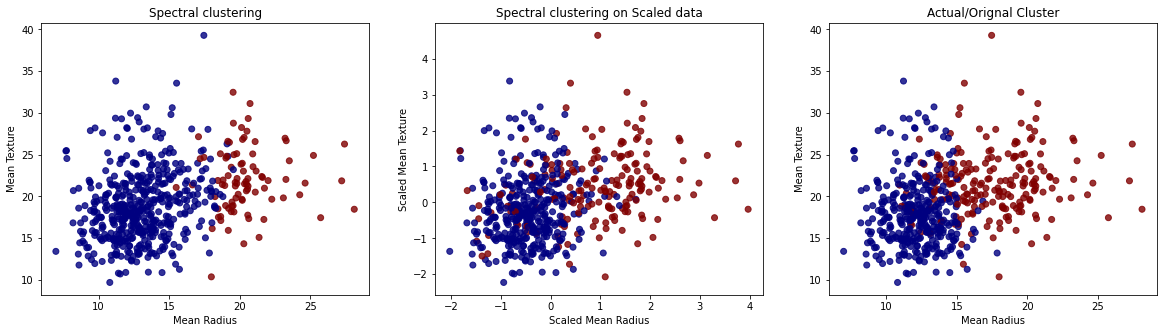

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],  c=ypred_normal, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=ypred_scaled, cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data')


plt.subplot(133)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [ ]:
print(f"Rand Score          ==> with normal data : {(np.round(metrics.rand_score(ypred_normal,y),4))} and when data is scaled : {(np.round(metrics.rand_score(ypred_scaled,y),4))} ")
print(f"Adjusted Rand Score ==> with normal data : {(np.round(metrics.adjusted_rand_score(ypred_normal,y),4))} and when data is scaled : {(np.round(metrics.adjusted_rand_score(ypred_scaled,y),4))} ")
print(f"V Measure Score     ==> with normal data : {(np.round(metrics.v_measure_score(ypred_normal,y),4))} and when data is scaled : {(np.round(metrics.v_measure_score(ypred_scaled,y),4))} ")
print(f"Homogeneity Score   ==> with normal data : {(np.round(metrics.homogeneity_score(ypred_normal,y),4))} and when data is scaled : {(np.round(metrics.homogeneity_score(ypred_scaled,y),4))} ")
print(f"Completeness Score  ==> with normal data : {(np.round(metrics.completeness_score(ypred_normal,y),4))} and when data is scaled : {(np.round(metrics.completeness_score(ypred_scaled,y),4))} ")


Rand Score          ==> with normal data : 0.6546 and when data is scaled : 0.7892 
Adjusted Rand Score ==> with normal data : 0.2872 and when data is scaled : 0.575 
V Measure Score     ==> with normal data : 0.3191 and when data is scaled : 0.4569 
Homogeneity Score   ==> with normal data : 0.4076 and when data is scaled : 0.4681 
Completeness Score  ==> with normal data : 0.2622 and when data is scaled : 0.4462 


In [ ]:
estimators = [
    ("brich_2", Birch(n_clusters = 2)),
    ("brich_3", Birch(n_clusters = 3)),
    ("brich_2_bf", Birch(n_clusters = 2,branching_factor=10)),
    ("brich_2_threshold", Birch(n_clusters = 2,threshold=0.1))
]

In [ ]:
score_metrics={}
models = {}
models_scaled = {}
def run_all(mode):
  for name,est in estimators:
    if (mode == 'normal'):
      labels = est.fit_predict(X)
    else:
      labels = est.fit_predict(X_scaled)
    list=[]  
    if ('2' in name):
      list.append((labels == y).sum())
    else:
      list.append('-')
    if (mode == 'normal'):
      models['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
      list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))
    else:
      models_scaled['ypred_'+name] =  labels
      list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
      list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
      list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
    
    list.append(np.round(metrics.homogeneity_score(y, labels),4))
    list.append(np.round(metrics.completeness_score(y, labels),4))
    list.append(np.round(metrics.v_measure_score(y,labels),4))
    list.append(np.round(metrics.rand_score(labels,y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
    score_metrics[name] = list
  return score_metrics

In [ ]:
normal_metrics = run_all('normal')
scaled_metrics = run_all('scaled')

In [ ]:
columns=['Correct Predictions','Calinski Harbaz Score','Sillhouette Score','Davies Bouldin Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Fowlkes Mallows Score']

In [ ]:
import pandas as pd
df = pd.DataFrame(normal_matrix,index=columns)
df.T

,Correct Predictions,Calinski Harbaz Score,Sillhouette Score,Davies Bouldin Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Fowlkes Mallows Score
brich_2,126.0,1088.1624,0.2622,0.4076,0.3191,0.6546,0.2872,0.69,0.4795,0.7392
brich_3,-,1089.9294,0.5266,0.3447,0.4167,0.6907,0.3903,0.5083,0.6314,0.6714
brich_2_bf,126.0,1088.1624,0.2622,0.4076,0.3191,0.6546,0.2872,0.69,0.4795,0.7392
brich_2_threshold,126.0,1088.1624,0.2622,0.4076,0.3191,0.6546,0.2872,0.69,0.4795,0.7392


In [ ]:
df_scaled = pd.DataFrame(scaled_metrics,index=columns)
df_scaled.T

,Correct Predictions,Calinski Harbaz Score,Sillhouette Score,Davies Bouldin Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Fowlkes Mallows Score
brich_2,501.0,441.0044,0.478,0.8793,0.4462,0.4681,0.4569,0.7892,0.575,0.8075
brich_3,-,603.5609,0.2522,1.8871,0.504,0.3946,0.4427,0.7685,0.5363,0.7785
brich_2_bf,501.0,441.0044,0.478,0.8793,0.4462,0.4681,0.4569,0.7892,0.575,0.8075
brich_2_threshold,501.0,441.0044,0.478,0.8793,0.4462,0.4681,0.4569,0.7892,0.575,0.8075


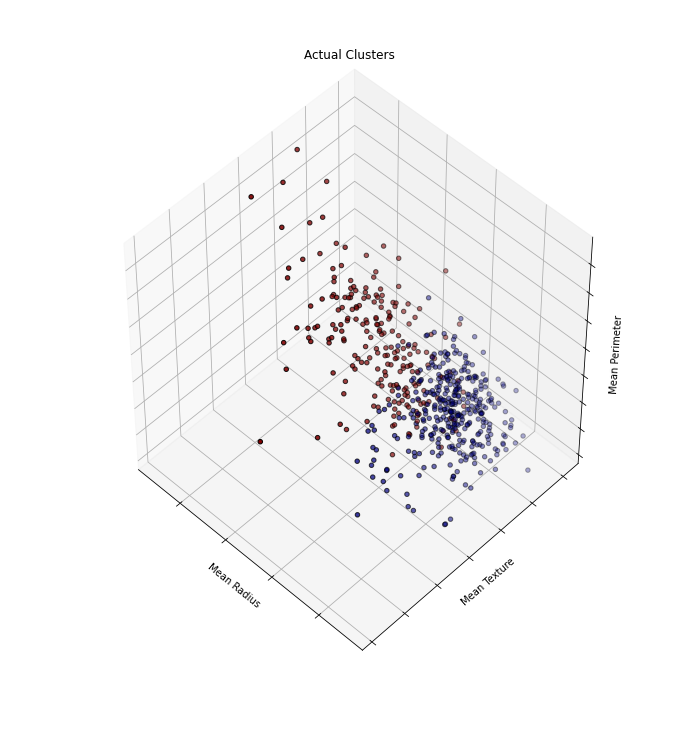

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet_r', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Actual Clusters')
ax.dist=12

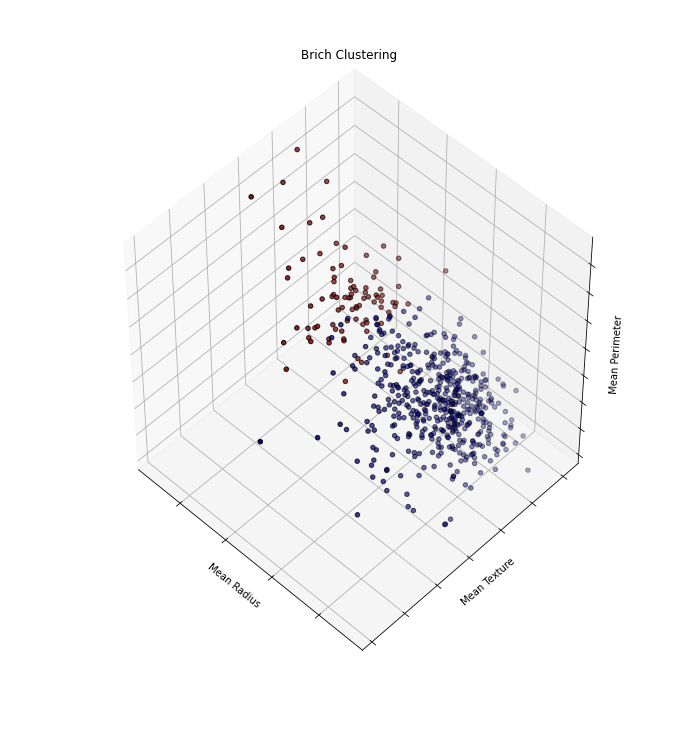

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_normal, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Brich Clustering')
ax.dist=12

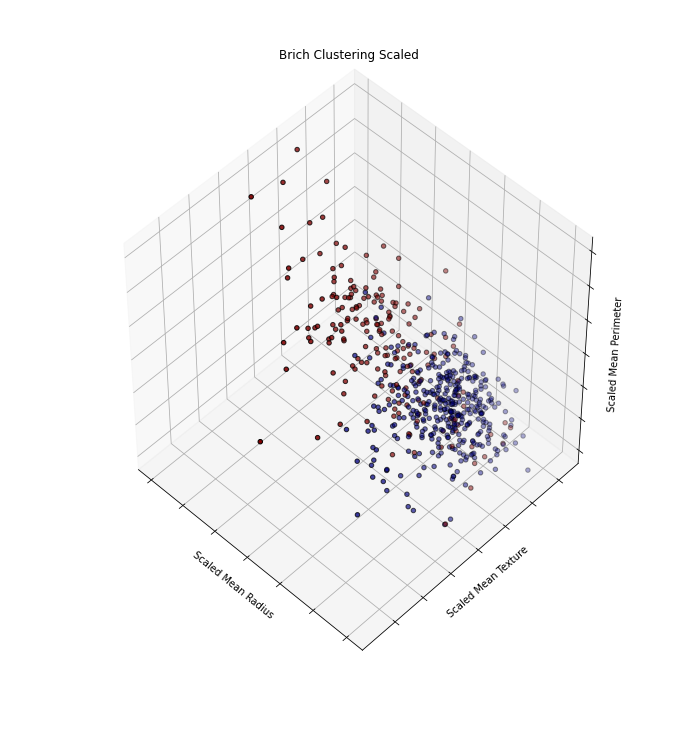

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=ypred_scaled, cmap='jet_r', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Scaled Mean Radius")
ax.set_ylabel("Scaled Mean Texture")
ax.set_zlabel("Scaled Mean Perimeter")
ax.set_title('Brich Clustering Scaled')
ax.dist=12